<a href="https://colab.research.google.com/github/aliiabedii/FirstTest/blob/main/waveletGoogLeNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cwt, morlet
from PIL import Image
import scipy.io as sio
import matplotlib.pyplot as plt

In [11]:
ECGData = sio.loadmat("ECGData.mat")


In [23]:


# Load the MATLAB file
ECGData = sio.loadmat("ECGData.mat")

# List the variables and their shapes
print(sio.whosmat("ECGData.mat"))


[('ECGData', (1, 1), 'struct')]


In [28]:
# Access the substructures
Data = ECGData['ECGData']['Data'][0, 0]  # Get the matrix as a numpy array
labels = ECGData['ECGData']['labels'][0, 0]  # Get the labels as a numpy array of objects
labels = [label[0].item() for label in labels.flatten()]
Data[:,:].shape
# plt.plot(Data[100,:])
labels

['healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'healthy',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 'damage',
 

In [52]:
# Define the sampling frequency and the signal length
Fs = 100
signalLength = 1000

# Define the wavelet parameters
scales = 2 ** np.arange(1, 9)  # Scales for the wavelet transform
w = 6  # Wavelet parameter for the Morlet wavelet
freqs = w * Fs / (2 * np.pi * scales)  # Frequencies corresponding to the scales

# Load the ECG data
# sig = ECGData.Data[0, :signalLength]
# ECGData = mt.loadmat("ECGData.mat")


# Compute the continuous wavelet transform using the Morlet wavelet
cfs = cwt(Data, morlet, scales, w=w)
cfs = cwt(Data[0,:], morlet(scales), scales)

# Compute the continuous wavelet transform using the Morlet wavelet
cfs = cwt((Data[1, :]), morlet(scales, s=2), scales)



# Plot the scalogram
t = np.arange(signalLength) / Fs
plt.figure()
plt.pcolor(t, freqs, np.abs(cfs), shading='interp')
plt.yscale('log')
plt.xlabel('Time (s)')
plt.ylabel('Frequency (Hz)')
plt.title('Scalogram')
plt.show()


TypeError: ignored

<ipython-input-116-d2e1d9821efd>:13: UserWarning: Attempt to set non-positive ylim on a log-scaled axis will be ignored.
  plt.imshow(cwt_row, aspect='auto', extent=[0, time[-1], 0, len(scales)], cmap='jet')


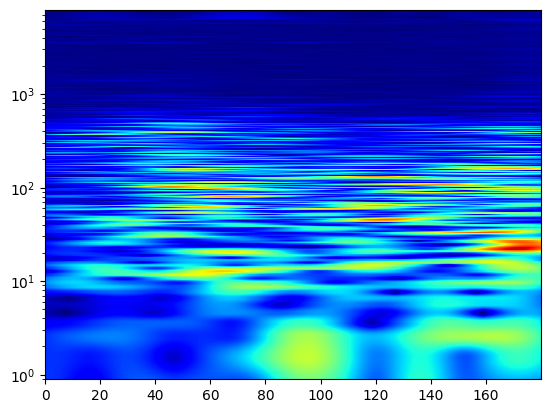

In [116]:
scales = np.arange(1, 8000)
sampling_frequency = 100
cwt_results = []
# test=Data[0,0:1000]
test=Data[100,:]

time = np.arange(len(test)) / sampling_frequency
# time = time[:1000]
cwt_row = np.abs(cwt(test, morlet, scales))
cwt_row.shape
time.shape
plt.yscale('log')
plt.imshow(cwt_row, aspect='auto', extent=[0, time[-1], 0, len(scales)], cmap='jet')


In [97]:
        cwt_result = np.abs(cwt(Data[1, :], cwtmatr, scales))

        # Visualize CWT result
        plt.figure(figsize=(6, 6))
        plt.imshow(cwt_result, aspect='auto', extent=[0, signal_length / sampling_frequency, 0, len(scales)],
                   cmap='jet')
        plt.colorbar(label='Magnitude')
        plt.title(f'CWT Result for Row {i}')
        plt.xlabel('Time (seconds)')
        plt.ylabel('Scale')

NameError: ignored

chatgpt1


In [98]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import savemat
from scipy.signal import cwt, cwtmatr, find_peaks

def create_rgb_from_tf(ecg_data, parent_folder, child_folder):
    # This function is only intended to support the ECGAndDeepLearningExample.
    # It may change or be removed in a future release.

    image_root = os.path.join(parent_folder, child_folder)
    os.makedirs(image_root, exist_ok=True)

    data = ecg_data['Data']
    labels = ecg_data['labels']

    _, signal_length = data.shape

    # Adjust parameters based on your requirements
    sampling_frequency = 100  # Hz
    scales = np.arange(1, 128)

    for i in range(data.shape[0]):
        # Compute continuous wavelet transform
        cwt_result = np.abs(cwt(data[i, :], cwtmatr, scales))

        # Visualize CWT result
        plt.figure(figsize=(6, 6))
        plt.imshow(cwt_result, aspect='auto', extent=[0, signal_length / sampling_frequency, 0, len(scales)],
                   cmap='jet')
        plt.colorbar(label='Magnitude')
        plt.title(f'CWT Result for Row {i}')
        plt.xlabel('Time (seconds)')
        plt.ylabel('Scale')

        # Save the CWT result as an image
        img_loc = os.path.join(image_root, str(labels[i]))
        os.makedirs(img_loc, exist_ok=True)
        img_file_name = f'{str(labels[i])}_{i}.png'
        img_path = os.path.join(img_loc, img_file_name)
        plt.savefig(img_path)
        plt.close()

if __name__ == "__main__":
    # Assume you have loaded the MATLAB data into a Python dictionary named 'ecg_data'
    # Replace 'your_parent_folder' and 'your_child_folder' with actual folder paths
    create_rgb_from_tf(ecg_data, 'your_parent_folder', 'your_child_folder')


ImportError: ignored

In [81]:
scales = np.arange(1, 128)

# Perform CWT on each row of the data matrix and store results in a list
cwt_results = []
for row in Data:
    cwt_row = np.abs(cwt(row, morlet, scales))
    cwt_results.append(cwt_row)

# Convert the list to a numpy array
cwt_results = np.array(cwt_results)

# Visualize the results (for illustration, you can customize this part)
plt.figure(figsize=(12, 6))
plt.imshow(cwt_results, aspect='auto', extent=[0, 8000, 0, len(Data)], cmap='jet')
plt.colorbar(label='Magnitude')
plt.title('Continuous Wavelet Transform')
plt.xlabel('Sample Index')
plt.ylabel('Row Index')
plt.show()

# cwt_results.shape
plt.figure(figsize=(120, 120))
plt.imshow(cwt_results[1,:])
plt.yscale("log")

TypeError: ignored

In [ ]:

# Define the helper function to create RGB images from the wavelet transform
def helperCreateRGBfromTF(ECGData, parentFolder, childFolder):
    # This function is only intended to support the ECGAndDeepLearningExample.
    # It may change or be removed in a future release.

    # Create the image root folder
    imageRoot = os.path.join(parentFolder, childFolder)

    # Get the data and labels
    data = ECGData.Data
    labels = ECGData.Labels

    # Get the number of signals and the signal length
    r, signalLength = data.shape

    # Create the wavelet filter bank
    scales = 2 ** np.arange(1, 9)
    w = 6
    freqs = w * Fs / (2 * np.pi * scales)

    # Loop over the signals
    for ii in range(r):
        # Compute the wavelet transform
        cfs = cwt(data[ii, :], morlet, scales, w=w)

        # Convert the absolute values to an RGB image
        im = Image.fromarray(np.uint8(plt.cm.jet(np.abs(cfs)) * 255))

        # Create the image location folder
        imgLoc = os.path.join(imageRoot, labels[ii])

        # Create the image file name
        imFileName = labels[ii] + '_' + str(ii) + '.jpg'

        # Save the resized image
        im.resize((224, 224)).save(os.path.join(imgLoc, imFileName))


sample


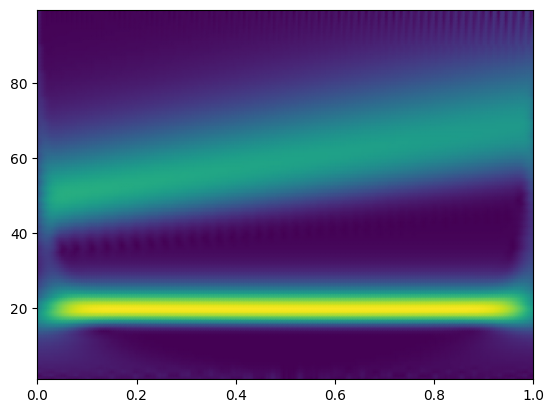

(100,)

In [35]:
from scipy import signal
import matplotlib.pyplot as plt
import numpy as np

t, dt = np.linspace(0, 1, 200, retstep=True)
fs = 1/dt
w = 6.
sig = np.cos(2*np.pi*(50 + 10*t)*t) + np.sin(40*np.pi*t)
freq = np.linspace(1, fs/2, 100)
widths = w*fs / (2*freq*np.pi)
cwtm = signal.cwt(sig, signal.morlet2, widths, w=w)
plt.pcolormesh(t, freq, np.abs(cwtm), cmap='viridis', shading='gouraud')
plt.show()
sig.shape
dt.shape
freq.shape

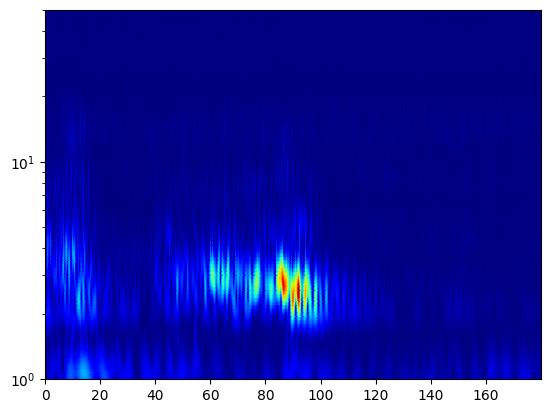

(18000,)

In [36]:
# t = np.linspace(0, len(Data[0]), 180)
fs = 100
t = np.arange(len(Data[0])) / fs


w = 6.    #defult=6.0
sig = Data[0,:]
# freq = np.linspace(1, fs/2, 100)
freq = np.logspace(np.log10(1), np.log10(fs/2), 100)

widths = w*fs / (2*freq*np.pi)
cwtm = signal.cwt(sig, signal.morlet2, widths, w=w)
plt.yscale("log")
# plt.imshow(np.abs(cwtm), aspect='auto', extent=[0, time[-1], 0, len(scales)], cmap='jet')

plt.pcolormesh(t, freq, np.abs(cwtm), cmap='jet', shading='gouraud')
# plt.pcolormesh(t, freq, np.abs(cwtm), cmap='viridis', shading='gouraud')
plt.show()
t.shape

<ipython-input-48-5bfaf109003c>:11: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  jet_colormap = cm.get_cmap('jet', 128)


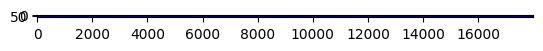

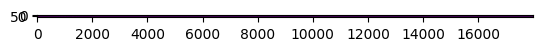

In [48]:
from matplotlib import cm
from skimage import img_as_ubyte, img_as_float
from skimage.io import imsave
from skimage.transform import resize

cwtm = abs(cwtm)
rescaled_cwtm = (cwtm - np.min(cwtm)) / (np.max(cwtm) - np.min(cwtm))
# uint8_cstm = (rescaled_cwtm * 255).astype(np.uint8)
uint8_cstm = img_as_ubyte(rescaled_cwtm)
# Create colormap
jet_colormap = cm.get_cmap('jet', 128)
rgb_image = jet_colormap(uint8_cstm)
# Map indexed image to RGB
# rgb_image = jet_colormap(uint8_cstm)

# Display the image
# plt.yscale("log")
plt.imshow(rgb_image)
plt.show()

# plt.pcolormesh(t, freq, uint8_cstm, cmap='jet', shading='gouraud')

KeyboardInterrupt: ignored

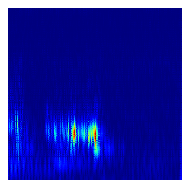

In [58]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import cwt, morlet
from google.colab import drive
from scipy import signal
from matplotlib.colors import Normalize




# Assuming you have loaded your data into the variables 'Data' and 'Labels'
# Replace these with your actual data and labels
# For demonstration, I'm assuming 'Labels' is a list of strings representing classes
# and 'Data' is a 2D NumPy array where each row corresponds to a signal

# Example data (replace this with your actual data)
# Data = np.random.rand(120, 1000)
# labels = ['healthy'] * 10 + ['damaged'] * 110

# Create a folder named 'Data' in Google Colab
colab_data_folder = '/content/Data'
os.makedirs(colab_data_folder, exist_ok=True)

# Get unique classes from the labels
unique_classes = set(labels)
# unique_classes = set(label[0] for label in labels.flatten())

# Create subfolders for each class
class_folders = {}
for class_name in unique_classes:
    class_folder = os.path.join(colab_data_folder, class_name)
    os.makedirs(class_folder, exist_ok=True)
    class_folders[class_name] = class_folder

# Set up parameters for CWT
fs = 100
w = 6.0
freq = np.logspace(np.log10(1), np.log10(fs/2), 100)

# Iterate through each row of the data
for i in range(Data.shape[0]):
    sig = Data[i, :]
    widths = w*fs / (2*freq*np.pi)
    cwt_result = np.abs(cwt(sig, signal.morlet2,widths,w=w))

    # Visualize and save CWT image
    plt.figure(figsize=(224/80, 224/80), dpi=80)
    plt.pcolormesh(np.arange(len(sig)) / fs, freq, np.abs(cwt_result), cmap='jet', shading='gouraud', norm=Normalize())
    # plt.colorbar(label='Magnitude')
    plt.yscale("log")  # Set y-axis to logarithmic scale
    plt.axis('off')  # Turn off axis
    # plt.title(f'CWT Result for Row {i} - Class: {labels[i]}')

    # labels = [label[0].item() for label in labels.flatten()]

    # Save image to the corresponding class folder in Google Colab
    # label = labels[i][0].item() if labels[i].size else None
    # class_folder = class_folders.get(labels)
    # Save image to the corresponding class folder in Google Colab
    # unique_classes = set(label[0] for label in labels.flatten())

    class_folder = class_folders.get(labels[i])
    if class_folder:
        image_name = f'CWT_Row_{i}_Class_{labels[i]}.png'
        image_path = os.path.join(class_folder, image_name)
        plt.savefig(image_path, bbox_inches='tight', pad_inches=0, transparent=True)
        plt.close()

# Notify that the process is completed
print("CWT images have been generated and stored in Google Colab.")


array(['healthy'], dtype='<U7')

In [60]:
ax= plt.imread("/content/Data/healthy/CWT_Row_0_Class_healthy.png")
ax.reshape(224,224,3)
ax.shape

ValueError: ignored